In [1]:
%matplotlib inline
from meme_wrapper import Meme
from Bio import SeqIO

In [2]:
train = [
    ('ce1cg', 
     'TAATGTTTGTGCTGGTTTTTGTGGCATCGGGCGAGAATAGCGCGTGGTGTGAAAGACTGTTTTTTTGATCGTTTTCACAAAAATGGAAGTCCACAGTCTTGACAG'),
    ('ara', 
     'GACAAAAACGCGTAACAAAAGTGTCTATAATCACGGCAGAAAAGTCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAG'),
    ('bglr1', 
     'ACAAATCCCAATAACTTAATTATTGGGATTTGTTATATATAACTTTATAAATTCCTAAAATTACACAAAGTTAATAACTGTGAGCATGGTCATATTTTTATCAAT'),
    ('crp', 
     'CACAAAGCGAAAGCTATGCTAAAACAGTCAGGATGCTACAGTAATACATTGATGTACTGCATGTATGCAAAGGACGTCACATTACCGTGCAGTACAGTTGATAGC'),
    ('cya', 
     'ACGGTGCTACACTTGTATGTAGCGCATCTTTCTTTACGGTCAATCAGCAAGGTGTTAAATTGATCACGTTTTAGACCATTTTTTCGTCGTGAAACTAAAAAAACC'),
    ('deop2', 
     'AGTGAATTATTTGAACCAGATCGCATTACAGTGATGCAAACTTGTAAGTAGATTTCCTTAATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA'),
    ('gale', 
     'GCGCATAAAAAACGGCTAAATTCTTGTGTAAACGATTCCACTAATTTATTCCATGTCACACTTTTCGCATCTTTGTTATGCTATGGTTATTTCATACCATAAGCC'),
    ('ilv', 
     'GCTCCGGCGGGGTTTTTTGTTATCTGCAATTCAGTACAAAACGTGATCAACCCCTCAATTTTCCCTTTGCTGAAAAATTTTCCATTGTCTCCCCTGTAAAGCTGT'),
    ('lac', 
     'AACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCAC'),
    ('male', 
     'ACATTACCGCCAATTCTGTAACAGAGATCACACAAAGCGACGGTGGGGCGTAGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAGTCCGTTTA'),
    ('malk', 
     'GGAGGAGGCGGGAGGATGAGAACACGGCTTCTGTGAACTAAACCGAGGTCATGTAAGGAATTTCGTGATGTTGCTTGCAAAAATCGTGGCGATTTTATGTGCGCA'),
    ('malt', 
     'GATCAGCGTCGTTTTAGGTGAGTTGTTAATAAAGATTTGGAATTGTGACACAGTGCAAATTCAGACACATAAAAAAACGTCATCGCTTGCATTAGAAAGGTTTCT'),
    ('ompa', 
     'GCTGACAAAAAAGATTAAACATACCTTATACAAGACTTTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTCAACTACGTTGTAGACTTTACATCGCC'),
    ('tnaa', 
     'TTTTTTAAACATTAAAATTCTTACGTAATTTATAATCTTTAAAAAAAGCATTTAATATTGCTCCCCGAACGATTGTGATTCGATTCACATTTAAACAATTTCAGA'),
    ('uxu1', 
     'CCCATGAGAGTGAAATTGTTGTGATGTGGTTAACCCAATTAGAATTCGGGATTGACATGTCTTACCAAAAGGTAGAACTTATACGCCATCTCATCCGATGCAAGC'),
    ('pbr322', 
     'CTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTC'),
    ('trn9cat', 
     'CTGTGACGGAAGATCACTTCGCAGAATAAATAAATCCTGGTGTCCCTGTTGATACCGGGAAGCCCTGGGCCAACTTTTGGCGAAAATGAGACGTTGATCGGCACG'),
    ('tdc', 
     'GATTTTTATACTTTAACTTGTTGATATTTAAAGGTATTTAATTGTAATAACGATACTCTGGAAAGTATTGAAAGTTAATTTGTGAGTGGTCGCACATATCCTGTT'),
    ]

# test data consists of first 9 sequences of training data
test = train[:9]

In [3]:
# saving data as fasta files
with open('seq18.fa','w') as f_train:
    for seq in train:
        f_train.write('>' + seq[0] + ' \n')
        f_train.write(seq[1] + '\n')
        
with open('seq9.fa','w') as f_test:
    for seq in test:
        f_test.write('>' + seq[0] + ' \n')
        f_test.write(seq[1] + '\n')

<h1>MEME Wrapper Example</h1>

In [4]:
# Meme().display_meme_help()

In [5]:
meme1 = Meme(alphabet="dna",    # {ACGT}
             mod="anr",     # Any number of repititions
             output_dir="meme_anr", 
             nmotifs=3,    # Number of motives to be found
             
             #Weblogo parameters
             wl_resolution = 200,
            )

meme1.fit(fasta_file="seq18.fa")

In [6]:
predictions = meme1.predict(fasta_file="seq9.fa", return_list=True)
for p in predictions: print p

[0, 1, 2]
[0, 1]
[0]
[0]
[0]
[0]
[0, 0, 1]
[0]
[0, 2]


In [7]:
predictions = meme1.predict(fasta_file="seq9.fa", return_list=False)
for p in predictions: print p

3
2
1
1
1
1
3
1
2


In [8]:
match = meme1.transform(fasta_file="seq9.fa", return_match=True)
for m in match: print m

[[(64, 83)], [(30, 44)], [(91, 105)]]
[[(58, 77)], [(36, 50)], []]
[[(79, 98)], [], []]
[[(66, 85)], [], []]
[[(53, 72)], [], []]
[[(10, 29)], [], []]
[[(27, 46), (54, 73)], [(3, 17)], []]
[[(42, 61)], [], []]
[[(12, 31)], [], [(37, 51)]]


In [9]:
match = meme1.transform(fasta_file="seq9.fa", return_match=False)
for m in match: print m

[1, 1, 1]
[1, 1, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 1, 0]
[1, 0, 0]
[1, 0, 1]


<h3>Motives' p-value scores corresponding to each sequence in test data</h3>

In [10]:
for i in meme1.seq_scores: print i

[[2.35e-06], [2.7e-07], [1.12e-08]]
[[4.67e-06], [2.01e-06], [0.0]]
[[6.76e-06], [0.0], [0.0]]
[[8.09e-06], [0.0], [0.0]]
[[3.02e-05], [0.0], [0.0]]
[[1.55e-06], [0.0], [0.0]]
[[1.74e-05, 3.51e-05], [1.88e-06], [0.0]]
[[3.51e-05], [0.0], [0.0]]
[[6.33e-07], [0.0], [3.51e-09]]


<h3>E-value of each motif</h3>

In [11]:
print meme1.e_values

[1.4e-05, 310.0, 1300.0]


<h2>fit_predict() and fit_transform() example</h2>

In [12]:
meme2 = Meme(alphabet="dna", mod="anr", nmotifs=3)

In [13]:
predictions = meme2.fit_predict(fasta_file="seq18.fa", return_list=True)
for p in predictions: print p

[0, 1, 2]
[0, 1]
[0]
[0]
[0]
[0]
[0, 0, 1]
[0]
[0, 2]
[0]
[0, 1]
[0]
[0]
[0]
[0]
[0, 1]
[1]
[0]


In [14]:
matches = meme2.fit_transform(fasta_file="seq18.fa", return_match=True)
for m in matches: print m

[[(64, 83)], [(30, 44)], [(91, 105)]]
[[(58, 77)], [(36, 50)], []]
[[(79, 98)], [], []]
[[(66, 85)], [], []]
[[(53, 72)], [], []]
[[(10, 29)], [], []]
[[(27, 46), (54, 73)], [(3, 17)], []]
[[(42, 61)], [], []]
[[(12, 31)], [], [(37, 51)]]
[[(17, 36)], [], []]
[[(64, 83)], [(15, 29)], []]
[[(44, 63)], [], []]
[[(51, 70)], [], []]
[[(74, 93)], [], []]
[[(20, 39)], [], []]
[[(56, 75)], [(81, 95)], []]
[[], [(79, 93)], []]
[[(81, 100)], [], []]


<h3>Print motives as lists</h3>

In [15]:
#printing motives as lists
for motif in meme1.motives_list:
    for m in motif:
        print m
    print

('male', 'TGTAACAGAGATCACACAA')
('ompa', 'CCTGACGGAGTTCACACTT')
('lac', 'TGTGAGTTAGCTCACTCAT')
('tdc', 'TGTGAGTGGTCGCACATAT')
('pbr322', 'TGTGAAATACCGCACAGAT')
('tnaa', 'TGTGATTCGATTCACATTT')
('deop2', 'TTTGAACCAGATCGCATTA')
('ce1cg', 'TTTGATCGTTTTCACAAAA')
('ara', 'TTTGCACGGCGTCACACTT')
('bglr1', 'TGTGAGCATGGTCATATTT')
('crp', 'TGCAAAGGACGTCACATTA')
('malt', 'TGTGACACAGTGCAAATTC')
('gale', 'TGTAAACGATTCCACTAAT')
('cya', 'TGTTAAATTGATCACGTTT')
('uxu1', 'TGTGATGTGGTTAACCCAA')
('ilv', 'CGTGATCAACCCCTCAATT')
('gale', 'TGTCACACTTTTCGCATCT')
('malk', 'CGTGATGTTGCTTGCAAAA')

('pbr322', 'GGAGAAAATACCGC')
('ce1cg', 'GGCGAGAATAGCGC')
('gale', 'GCATAAAAAACGGC')
('malk', 'GATGAGAACACGGC')
('ara', 'GCAGAAAAGTCCAC')
('trn9cat', 'GGCGAAAATGAGAC')

('lac', 'CCCCAGGCTTTACA')
('ce1cg', 'CCACAGTCTTGACA')



<h3>Display Sequence logo of un-aligned motives</h3>

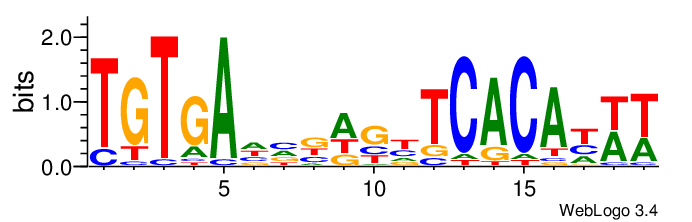

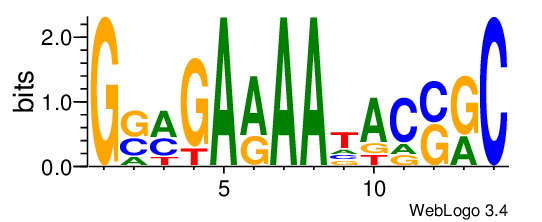

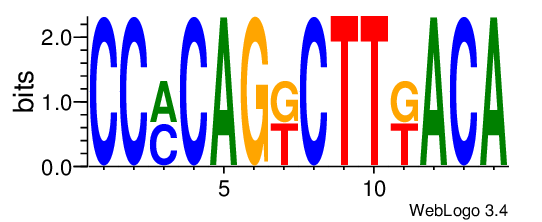

In [16]:
meme1.display_logo(do_alignment=False)

<h3>Display Logo of specified motif</h3>

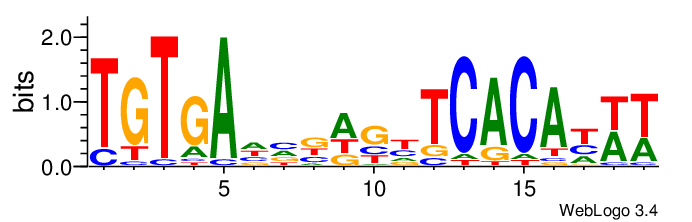

In [17]:
meme1.display_logo(motif_num=1)

<h3>Multiple Sequence Alignment of motives with Muscle</h3>
Note: Motives in this example were already aligned, hence no dashes appear in the alignment

In [18]:
meme1.align_motives()    #MSA with Muscle
motives1=meme1.aligned_motives_list
for m in motives1:
    for i in m:
        print i
    print

('male', 'TGTAACAGAGATCACACAA')
('ompa', 'CCTGACGGAGTTCACACTT')
('lac', 'TGTGAGTTAGCTCACTCAT')
('tdc', 'TGTGAGTGGTCGCACATAT')
('pbr322', 'TGTGAAATACCGCACAGAT')
('tnaa', 'TGTGATTCGATTCACATTT')
('deop2', 'TTTGAACCAGATCGCATTA')
('ce1cg', 'TTTGATCGTTTTCACAAAA')
('ara', 'TTTGCACGGCGTCACACTT')
('bglr1', 'TGTGAGCATGGTCATATTT')
('crp', 'TGCAAAGGACGTCACATTA')
('malt', 'TGTGACACAGTGCAAATTC')
('gale', 'TGTAAACGATTCCACTAAT')
('cya', 'TGTTAAATTGATCACGTTT')
('uxu1', 'TGTGATGTGGTTAACCCAA')
('ilv', 'CGTGATCAACCCCTCAATT')
('gale', 'TGTCACACTTTTCGCATCT')
('malk', 'CGTGATGTTGCTTGCAAAA')

('pbr322', 'GGAGAAAATACCGC')
('ce1cg', 'GGCGAGAATAGCGC')
('gale', 'GCATAAAAAACGGC')
('malk', 'GATGAGAACACGGC')
('ara', 'GCAGAAAAGTCCAC')
('trn9cat', 'GGCGAAAATGAGAC')

('lac', 'CCCCAGGCTTTACA')
('ce1cg', 'CCACAGTCTTGACA')



<h3>Display sequence logo of aligned motives</h3>

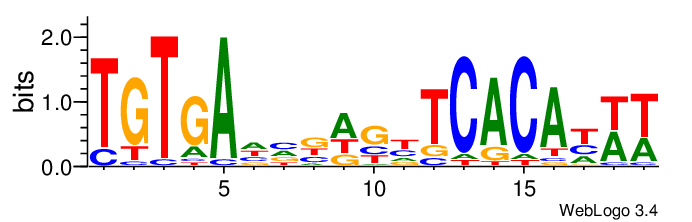

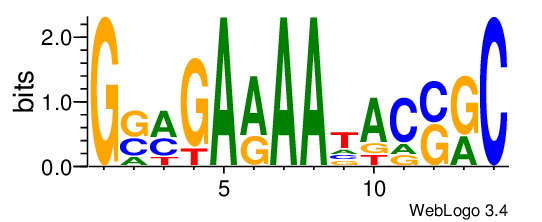

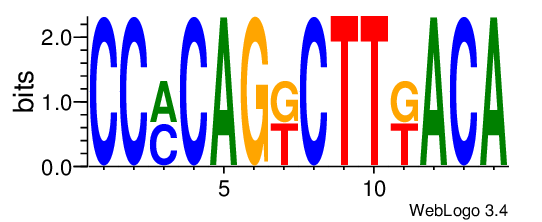

In [19]:
meme1.display_logo(do_alignment=True)

<h2>Example of PWM Class</h2>

In [21]:
from utilities import MotifWrapper
pwm1 = MotifWrapper(alphabet='dna', pseudocounts=0)

motives=meme1.motives_list
pwm1.fit(motives)

In [22]:
pwm1.display()

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
A:   0.00   0.00   0.00   0.17   0.94   0.33   0.28   0.11   0.50   0.06   0.17   0.00   0.06   0.78   0.06   0.78   0.22   0.44   0.33
C:   0.17   0.06   0.06   0.06   0.06   0.22   0.33   0.22   0.00   0.22   0.28   0.11   0.89   0.00   0.89   0.06   0.28   0.06   0.06
G:   0.00   0.78   0.00   0.72   0.00   0.17   0.22   0.39   0.22   0.50   0.17   0.17   0.00   0.17   0.00   0.06   0.06   0.00   0.00
T:   0.83   0.17   0.94   0.06   0.00   0.28   0.17   0.28   0.28   0.22   0.39   0.72   0.06   0.06   0.06   0.11   0.44   0.50   0.61

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

_Display PWM of single motif_

In [23]:
pwm1.display(motif_num=3)

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
A:   0.00   0.00   0.50   0.00   1.00   0.00   0.00   0.00   0.00   0.00   0.00   1.00   0.00   1.00
C:   1.00   1.00   0.50   1.00   0.00   0.00   0.00   1.00   0.00   0.00   0.00   0.00   1.00   0.00
G:   0.00   0.00   0.00   0.00   0.00   1.00   0.50   0.00   0.00   0.00   0.50   0.00   0.00   0.00
T:   0.00   0.00   0.00   0.00   0.00   0.00   0.50   0.00   1.00   1.00   0.50   0.00   0.00   0.00



_Scoring a sequence w.r.t a motif_

In [24]:
test_seq = 'GGAGAAAATACCGC' * 10
seq_score = pwm1.score(motif_num=2, seq=test_seq)
print seq_score

[0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010288065843621397]
